# Universo / Target

## Definición de target

Target = 1 cuando el alumno no curso ni rindió finales por 2 ciclos lectivos consecutivos y no haya finalizado la carrera

## Dataset a armar

ejemplo

| Alumno | Ciclo | Target |
| --- | --- | --- |
| 1 | 2010 | 0 |
| 1 | 2011 | 0 |
| 1 | 2012 | 1 |
| 1 | 2013 | 1 |
| 2 | 2012 | 0 |
| 2 | 2013 | 0 |
| 2 | 2014 | 0 |
| 2 | 2015 | 0 |

- ciclo minimo es el año de ingreso del alumno
- ciclo maximo es el año de egreso del alumno o del ultimo registro (cursadas o finales) + 2




In [2]:
import pandas as pd
import numpy as np

In [22]:
import seaborn as sns

In [3]:
from ydata_profiling import ProfileReport

/Users/sjaremczuk/Library/Caches/pypoetry/virtualenvs/tesis-ds-polkNLC9-py3.9/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Users/sjaremczuk/Library/Caches/pypoetry/virtualenvs/tesis-ds-polkNLC9-py3.9/lib/python3.9/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


## Datos de entrada

In [4]:
curdf = pd.read_pickle('../data/raw_cleaned/curdf_02.pkl')
print('cur shape: ',curdf.shape)
curdf_comp = pd.read_pickle('../data/raw_cleaned/curdf_complementario_02.pkl')
print('cur_comp shape: ',curdf_comp.shape)
datdf = pd.read_pickle('../data/raw_cleaned/datdf_02.pkl')
print('datdf shape: ',datdf.shape)
findf = pd.read_pickle('../data/raw_cleaned/findf_02.pkl')
print('fin shape: ',findf.shape)
df_ultimos_registros = pd.read_pickle('../data/processed/dataset_intermedio_primeros_y_ultimos_registros.pkl')
print('df_ultimos_registros shape: ',df_ultimos_registros.shape)

cur shape:  (465939, 9)
cur_comp shape:  (171997, 9)
datdf shape:  (20250, 5)
fin shape:  (431968, 8)
df_ultimos_registros shape:  (20250, 8)


## Reduccion de alumnos

- solo quedan los alumnos de las carreras:

|cod|carrera|alumnos|
|---|----------|----------|
| K | sistemas |     8702 |
|R|electronica|     3278|
|S|mecanica     |2822|
|V|quimica     |2475|
|O|civil     |2045|
|Q|eléctrica|      928|

In [6]:
df_ultimos_registros.columns

Index(['codigo_alumno', 'anio_ingreso', 'codigo_carrera_ingreso',
       'ultima_cursada', 'ultimo_final', 'final_proyecto_final',
       'nota_txt_proyecto_final', 'codigo_fin_carrera'],
      dtype='object')

In [7]:
df_ultimos_registros.head()

,codigo_alumno,anio_ingreso,codigo_carrera_ingreso,ultima_cursada,ultimo_final,final_proyecto_final,nota_txt_proyecto_final,codigo_fin_carrera
0,10035,2002,K,2009.0,2009.0,NaN,NaN,NaN
1,10036,2003,K,2007.0,2004.0,NaN,NaN,NaN
2,10039,2000,K,2007.0,2007.0,NaN,NaN,NaN
3,10042,2000,K,2008.0,2007.0,NaN,NaN,NaN
4,10044,2006,K,2007.0,2006.0,NaN,NaN,NaN


In [8]:
df = df_ultimos_registros.copy()
# agrego ultimo registro
df['ultimo_registro'] = df.apply(lambda x: max( [x.ultima_cursada, x.ultimo_final] ), axis=1)

In [13]:
df.nota_txt_proyecto_final.value_counts()

Aprobada    1513
Name: nota_txt_proyecto_final, dtype: int64

In [14]:
df['anio_desertor'] = df.apply(lambda x: x.ultimo_registro + 2, axis=1)
df['desertor'] = df.apply(lambda x: 1 if ((x.anio_desertor < 2022)&(x.nota_txt_proyecto_final != 'Aprobada' )) else 0, axis=1)

In [15]:
df.head()

,codigo_alumno,anio_ingreso,codigo_carrera_ingreso,ultima_cursada,ultimo_final,final_proyecto_final,nota_txt_proyecto_final,codigo_fin_carrera,ultimo_registro,anio_desertor,desertor
0,10035,2002,K,2009.0,2009.0,NaN,NaN,NaN,2009.0,2011.0,1
1,10036,2003,K,2007.0,2004.0,NaN,NaN,NaN,2007.0,2009.0,1
2,10039,2000,K,2007.0,2007.0,NaN,NaN,NaN,2007.0,2009.0,1
3,10042,2000,K,2008.0,2007.0,NaN,NaN,NaN,2008.0,2010.0,1
4,10044,2006,K,2007.0,2006.0,NaN,NaN,NaN,2007.0,2009.0,1


In [16]:

df.desertor.value_counts()

1    11786
0     8464
Name: desertor, dtype: int64

In [31]:
aux = pd.DataFrame( {
    'cant_anios': df['ultimo_registro'] - df['anio_ingreso'], 
    'desertor':df['desertor'],
    'carrera': df['codigo_carrera_ingreso']
    } )
aux[aux.desertor == 1]['cant_anios'].describe()

count    11786.000000
mean         4.962498
std          4.383188
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         40.000000
Name: cant_anios, dtype: float64

<Axes: xlabel='desertor', ylabel='cant_anios'>

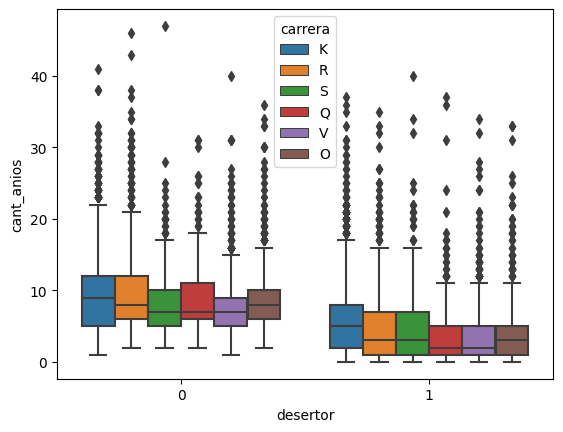

In [32]:
sns.boxplot( y=aux['cant_anios'], x=aux['desertor'], hue=aux['carrera'] )

In [33]:
df.anio_ingreso.describe()

count    20250.000000
mean      2009.781185
std          5.793368
min       1972.000000
25%       2006.000000
50%       2010.000000
75%       2014.000000
max       2019.000000
Name: anio_ingreso, dtype: float64

In [39]:
perc = [x for x in np.round(np.arange(0,1,0.05),2) ]

In [40]:
df.anio_ingreso.describe(percentiles= perc)

count    20250.000000
mean      2009.781185
std          5.793368
min       1972.000000
0%        1972.000000
5%        1999.000000
10%       2002.000000
15%       2004.000000
20%       2005.000000
25%       2006.000000
30%       2007.000000
35%       2008.000000
40%       2009.000000
45%       2009.000000
50%       2010.000000
55%       2011.000000
60%       2012.000000
65%       2013.000000
70%       2013.000000
75%       2014.000000
80%       2015.000000
85%       2016.000000
90%       2017.000000
95%       2018.000000
max       2019.000000
Name: anio_ingreso, dtype: float64

In [47]:
df[df.anio_ingreso < 1999]['codigo_carrera_ingreso'].value_counts()

K    416
R    162
V     59
S     51
O     34
Q     20
Name: codigo_carrera_ingreso, dtype: int64

In [48]:
df[df.anio_ingreso < 1999]['anio_ingreso'].describe(percentiles= perc)

count     742.000000
mean     1994.799191
std         3.976496
min      1972.000000
0%       1972.000000
5%       1986.000000
10%      1991.000000
15%      1992.000000
20%      1993.000000
25%      1994.000000
30%      1994.000000
35%      1995.000000
40%      1995.000000
45%      1996.000000
50%      1996.000000
55%      1996.000000
60%      1997.000000
65%      1997.000000
70%      1997.000000
75%      1997.000000
80%      1998.000000
85%      1998.000000
90%      1998.000000
95%      1998.000000
max      1998.000000
Name: anio_ingreso, dtype: float64

<Axes: xlabel='anio_ingreso'>

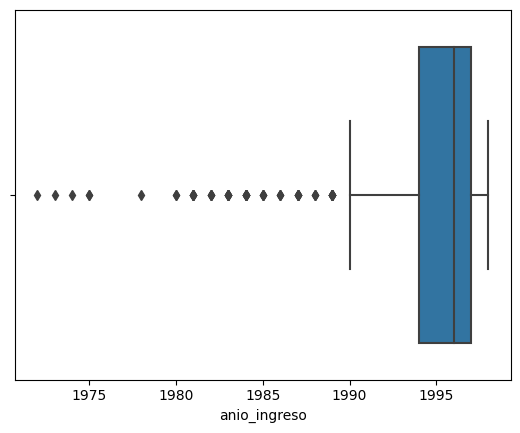

In [50]:
sns.boxplot(x = df[df.anio_ingreso < 1999]['anio_ingreso'])

## Criterio

- se podria reducir el dataset para aquellos alumnos que entraton dsps de 1994 asi entran con los planes de carrera 95 y 95A ya que los planes de carrera anteriores son muy distintos

In [51]:
df[df.anio_ingreso < 1995]['anio_ingreso']

11       1986
25       1993
119      1993
254      1992
634      1992
         ... 
20061    1994
20076    1994
20098    1992
20099    1990
20120    1994
Name: anio_ingreso, Length: 234, dtype: int64

### conclusion

de los 20.250 alumnos que entraron a la facultad, se descartarian solo 234 alumnos y de carrearas variadas. Sigue siendo una muestra representativa y reduce significativamente la complejidad de análisis

## Reducimos dataset y guardamos

In [52]:
df.columns

Index(['codigo_alumno', 'anio_ingreso', 'codigo_carrera_ingreso',
       'ultima_cursada', 'ultimo_final', 'final_proyecto_final',
       'nota_txt_proyecto_final', 'codigo_fin_carrera', 'ultimo_registro',
       'anio_desertor', 'desertor'],
      dtype='object')

In [53]:
delete = df.codigo_alumno[df.anio_ingreso < 1995]

In [54]:
df = df[~df.codigo_alumno.isin(delete)]

In [55]:
df.shape

(20016, 11)

In [56]:
cur = curdf[curdf.codigo_alumno.isin(df.codigo_alumno)]
fin = findf[findf.codigo_alumno.isin(df.codigo_alumno)]
curcomp = curdf_comp[curdf_comp.codigo_alumno.isin(df.codigo_alumno)]
dat = datdf[datdf.codigo_alumno.isin(df.codigo_alumno)]

df_ult = df_ultimos_registros[df_ultimos_registros.codigo_alumno.isin(df.codigo_alumno)]

In [57]:
cur.to_pickle('../data/raw_cleaned/curdf_03.pkl')
cur.to_csv('../data/raw_cleaned/curdf_03.csv')
fin.to_pickle('../data/raw_cleaned/findf_03.pkl')
fin.to_csv('../data/raw_cleaned/findf_03.csv')
curcomp.to_pickle('../data/raw_cleaned/curdf_complementario_03.pkl')
curcomp.to_csv('../data/raw_cleaned/curdf_complementario_03.csv')
dat.to_pickle('../data/raw_cleaned/datdf_03.pkl')
dat.to_csv('../data/raw_cleaned/datdf_03.csv')
df_ult.to_pickle('../data/processed/dataset_intermedio_primeros_y_ultimos_registros_03.pkl')
df_ult.to_csv('../data/processed/dataset_intermedio_primeros_y_ultimos_registros_03.csv')
df.to_pickle('../data/processed/df_agrupado_target_03.pkl')
df.to_csv('../data/processed/df_agrupado_target_03.csv')

In [58]:
print('cur shape: ',cur.shape)
print('cur_comp shape: ',curcomp.shape)
print('datdf shape: ',dat.shape)
print('fin shape: ',fin.shape)
print('df_ultimos_registros shape: ',df_ult.shape)
print('df_agrupado_target shape: ',df.shape)

cur shape:  (464280, 9)
cur_comp shape:  (165810, 9)
datdf shape:  (20016, 5)
fin shape:  (424410, 8)
df_ultimos_registros shape:  (20016, 8)
df_agrupado_target shape:  (20016, 11)
